In [2]:
from IPython import display

# CDS Pipeline Tutorial

## System requirements

- Windows 10 or Windows 11, with latest system updates
- macOS Monterey 12.1 if the following dependencies are installed and added to the path manually
  - Bash (https://formulae.brew.sh/formula/bash)
  - TransDecoder v5.0.1 (https://github.com/TransDecoder/TransDecoder/releases/tag/v5.0.1)
  - BioPython (https://biopython.org/wiki/Download)

### Step 1 - download and extract the archive
- The archive contains a folder called '**CDS-pipeline**', the information about project files is available as a **README.md**.

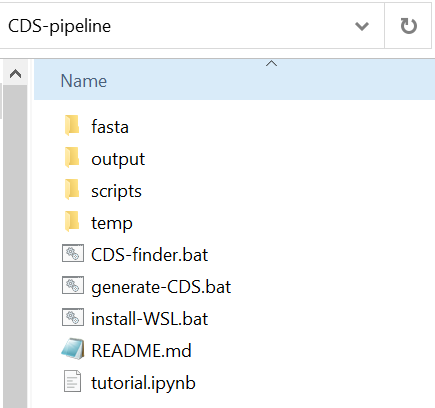

In [2]:
display.Image("https://raw.githubusercontent.com/dli417/bioinformatics-r/main/group-project-images/CDS_pipeline.png")

### Step 2 - install Ubuntu (Windows only)
- Right-click '**install-WSL.bat**', then select '**Run as administrator**' to install WSL.
  - If prompted by Microsoft Defender, click "More info", followed by "Run anyway"

- Open Ubuntu.

- Once it installs, you will be prompted to create a **Username and Password** - make sure you can remember these. When typing your new password, you will not be able to see the characters.



### Step 3 - run the pipeline
- Put FASTA files in .fas format (or gzipped FASTA files in .gz.fas format) to analyse in the '**fasta**' folder.

- Double-click 'generate-CDS.bat' to predict coding protein sequences, which are output to the '**output**' folder.
  - If prompted by Microsoft Defender, click "More info", followed by "Run anyway"
  - macOS users should run scripts/generate-CDS-macOS.sh in a bash shell

- The pipeline consists of six automated steps：

 1) Check dependencies (e.g. transdecoder) and install them if not yet installed (dependency messages will only appear if dependencies are not found).

 2) Extract compressed FASTA files. The decompressed files will be placed in the **fasta** folder. This step is automatically skipped if the FASTA files are not in compressed form

 3) Check for sequences containing non-GATC bases incompatible with TransDecoder. If present, remove these sequences.
    - These sequences will be put into an **excluded_sequences** folder in the **output** folder if needed.

 4) Predict CDS with TransDecoder. CDS files can be found in the **output** folder as **.pep** file
    - **CDS Pipeline** can analyse multiple databases in parallel, thus making this step quick and efficient for the user

 5) Rename sequence headers in human-readable format.

   - Initial header example:
   - >Gene.1::TCep-01a02.p1k::g.1::m.1 Gene.1::TCep-01a02.p1k::g.1  ORF type:5prime_partial len:126 (+),score=6.64 TCep-01a02.p1k:2-379(+)

   - Reformatted header example:
   - >EST=TCep-01a02.p1k ORF_type=missing_start ORF_length=126 Strand=direct ORF_coordinates_in_EST=2-379 TransDecoder_score=6.64

 6) Clean-up of temporary files in the temp folder.

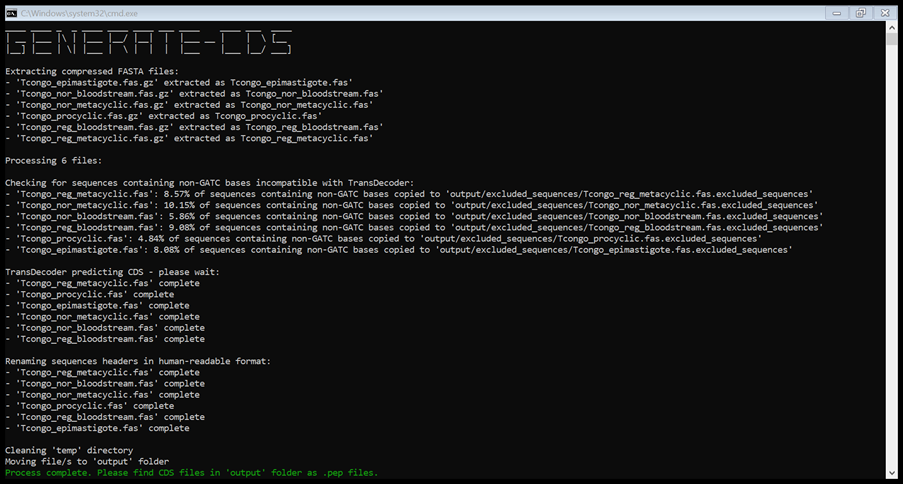

In [4]:
display.Image("https://raw.githubusercontent.com/dli417/bioinformatics-r/main/group-project-images/generate-CDS.bat.png")

### Step 4 - CDS finder
- **CDS Finder** allows the retrieval of protein sequences based on a FASTA header ID or other header information
- If any of the user inputs are in the wrong formatting (or no file/protein sequence is found matching search terms), the program will let the user know.
- CDS Finder can be run in two ways
  - When run without command line arguments, it will prompt the user for input files
  - When run with command line arguments, it will run non-interactively/automatically without further user input
- Double-click 'CDS-finder.bat' to start the CDS Finder
  - If prompted by Microsoft Defender, click "More info", followed by "Run anyway"
  - macOS users should run scripts/CDS-finder.sh in a bash shell
- To use the user interface protein finder:

    1) You will be prompted to input the file name (this is the database you are interested in). Insert the name of the database without the "**.pep**" end.
    2) You will be given a list of options for retrieval. These include EST identifier, ORF type, ORF length, strand, ORF coordinates within the EST or the protein score given by transdecoder. Please choose one and (using the formatting required as given in the options list) write your conditions (e.g. ORF_type=complete).
    - NOTE: you can specify multiple conditions and specify whether each sequence should meet all the conditions (all) or just one (leave empty or 'any') (e.g. orf_type=complete,strand=reverse,all)
    1) **CDS finder** will look through your database for all protein sequences meeting your set requirements and will output a file in the '**output**' folder named after your search criteria. This also gives you the possiblity of searching for more in depth criteria by inputting in the program an already filtered file (further filtering your sequences).
    2) **CDS finder** will also let the user know how many protein sequences meet their criteria.

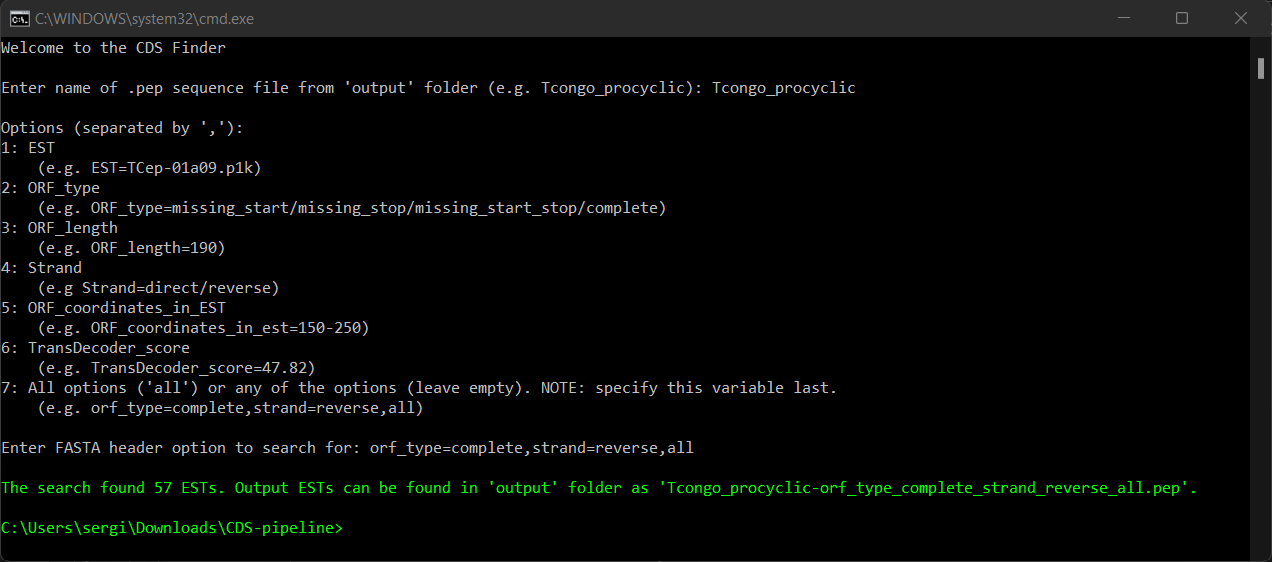

In [5]:
display.Image("https://raw.githubusercontent.com/dli417/bioinformatics-r/main/group-project-images/CDS-finder.bat.png")

- Users also have the possibility of using CDS finder on a command line (ubuntu). This can be done by opening ubuntu within the desired folder. This can simply be done by Shift + Right-clicking within the desired folder on Windows 10, then selecting "Open Linux shell here".
- For Windows 11, ubuntu will have to be manually opened. Start the Ubuntu app from the start menu.
- From here, type ./CDS-finder.sh -h for the help page:

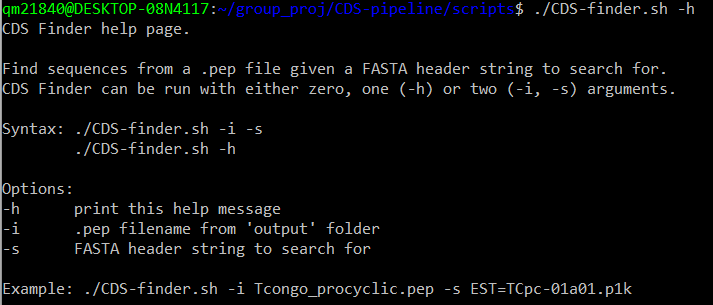

In [7]:
display.Image("https://raw.githubusercontent.com/dli417/bioinformatics-r/main/group-project-images/protein-help.png")

- As summarised from the help page, here is an example to look for all complete orf sequences (orf_type=complete) which are also part of a reverse strand (strand=reverse). 
- "all" is specified to select only sequences which are BOTH complete and reverse strand. 
- If we were to use "any", we would get the sequences that are complete OR reverse.

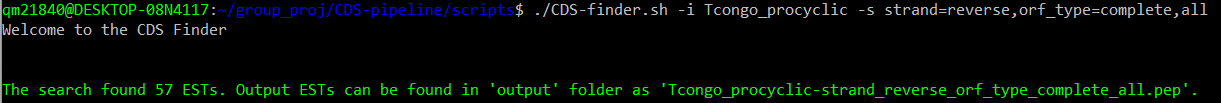

In [8]:
display.Image("https://raw.githubusercontent.com/dli417/bioinformatics-r/main/group-project-images/gene-finder-sh.png")

# Analysis of results

#### Background information on datasets

- Our data consists in 4 datasets. Three of them represent the stages of the life cycle of Trypanosoma congolense (a pathogen of livestock in Africa): Procyclic, Epimastigote and Metacyclic. The fourth represents the bloodstream stage of the parasite (which occurs prior to infection of livestock). 
- Culture-derived parasites from these stages were used to construct cDNA libraries and expressed sequence tags in each library were sequenced
	- ESTs: Expressed sequences tag (short sub-sequence of a cDNA sequence)
- Each dataset contains these ESTs which must be converted to protein sequences and their ORFs must be identified for further analysis of the parasite.
- Two of the four regular cDNA libraries (Metacyclic and Bloodstream Stage) were subjected to a normalization procedure designed to reduce the most abundant ESTs in the library (giving us 6 datasets total).

#### Pipeline results
- Following the use of our pipeline, these ORFs will thus have been identified and their protein sequences predicted.
- Our new headers will allow for better understanding of the sequences (for example, whether the ORFs are of partial or full length, or if they come from a direct or reverse strand).
- As TransDecoder component of our workflow cannot process non-GATC sequences, our non-GTAC base removing program will ensure that only fully sequenced ESTs are analysed and the excluded sequences may be used for more in depth analysis using tools such as error correction codes to predict their full sequence. In the case of the Typanosoma congolense datasets, the following number of sequences were removed:
	- Procyclic dataset: 4.84%
	- Epimastigote dataset: 8.08%
	- Metacyclic dataset: 8.57%
	- Bloodstream dataset: 9.08%
	- Normalised metacyclic dataset: 10.15%
	- Normalised bloodstream dataset: 5.86%
- While the number of sequences here is not small, removing any sequences containing non-GATC bases is the logical solution when attempting to achieve reliable results from the given dataset
  - Removing only the bases unrecognised by TransDecoder (non-GATC bases) would cause frameshifts which may cause TransDecoder to predict CDS that do not exist
  - When non-GATC bases (i.e. hyphens) are replaced with N, TransDecoder will ignore the whole line of sequence. For FASTA files with single line sequences, this would also completely exclude sequences with non-GATC bases from analysis. For multi-line FASTA files, the sequence before and after the line containing non-GATC characters would be incorrectly seen as one sequence, which may cause TransDecoder to predict CDS that do not exist
- Our protein finder program can help with further analysis, as it allows for filtering of different subgroups of ESTs (for example, if only full ORFs are needed).


#### BUSCO analysis
The BUSCO analysis provides a measure for the completeness of the gene sets obtained, based on expectations of gene content from Benchmarking Universal Single-Copy Orthologs, also known as BUSCOS. The gene sets were compared to data sets for Eukaryota and Euglenzoa lineages, the domain and phylum under which T. congolense falls respectively. BUSCO was run in the mode: proteins. The BUSCO analysis identified more complete BUSCOs from the Eukaryota lineage dataset than the Euglenozoa lineage data set, however the proportion of missing BUSCOs is higher when comparing to the Eukaryota lineage dataset. We would not expect to see BUSCO-complete gene sets as we are focussing on specific life stages. Instead, it is the differences between BUSCOs detected at each stage that is important. 

 ESTs sequenced from the normalised datasets (nor_metacyclic and nor_bloodstream) contained a slightly higher fraction of BUSCOs than the original non-normalised datasets. The individual BUSCOs found could also be compared to investigate the differences between life cycles. For example, the 1 complete BUSCO (BUSCO ID 1228942at2759) found in the epimastigote stage gene set (Tcongo_epimastigote.pep) was also found complete in the normalised metacyclic stage gene set (Tcongo_nor_metacyclic.pep), but not in any of the other gene sets.

##### Results Key:
- C: Complete BUSCOs
  - S: Complete and single-copy BUSCOs
  - D: Complete and duplicated BUSCOs
- F: Fragmented BUSCOs
- M: Missing BUSCOs
- n: Total BUSCO groups searched

##### Results:

Lineage dataset: euglenozoa_odb10 (Creation date: 2020-08-05, number of genomes: 31, number of BUSCOs: 130)

| Gene Set                   | C (=S+D)  | S         | D      | F         | M           | n   |
|----------------------------|-----------|-----------|--------|-----------|-------------|-----|
| Tcongo_reg_metacyclic.pep  | 0 (0%)    | 0 (0%)    | 0 (0%) | 10 (7.7%) | 120 (93.2%) | 130 |
| Tcongo_nor_metacyclic.pep  | 0  (0%)   | 0 (0%)    | 0 (0%) | 8 (6.2%)  | 122 (93.8%) | 130 |
| Tcongo_reg_bloodstream.pep | 1  (0.8%) | 1  (0.8%) | 0 (0%) | 12 (9.2%) | 117 (90.0%) | 130 |
| Tcongo_nor_bloodstream.pep | 0  (0%)   | 0 (0%)    | 0 (0%) | 6 (6.4%)  | 124 (95.4%) | 130 |
| Tcongo_procyclic.pep       | 0  (0%)   | 0 (0%)    | 0 (0%) | 10 (7.7%) | 120 (93.2%) | 130 |
| Tcongo_epimastigote.pep    | 0  (0%)   | 0 (0%)    | 0 (0%) | 10 (7.7%) | 120 (93.2%) | 130 |


Lineage dataset: eukaryota_odb10 (Creation date: 2020-09-10, number of genomes: 70, number of BUSCOs: 255)

| Gene Set                   | C (=S+D)  | S         | D        | F         | M           | n   |
|----------------------------|-----------|-----------|----------|-----------|-------------|-----|
| Tcongo_reg_metacyclic.pep  | 6 (2.4%)  | 5 (2.0%)  | 1 (0.4%) | 4 (1.6%)  | 245 (96.0%) | 255 |
| Tcongo_nor_metacyclic.pep  | 9  (3.5%) | 7 (2.7%)  | 2 (0.8%) | 5 (2.0%)  | 241 (94.5%) | 255 |
| Tcongo_reg_bloodstream.pep | 8  (3.1%) | 6  (2.4%) | 2 (0.8%) | 11 (4.2%) | 236 (92.5%) | 255 |
| Tcongo_nor_bloodstream.pep | 8  (3.1%) | 7 (2.7%)  | 1 (0.4%) | 12 (4.7%) | 235 (92.2%) | 255 |
| Tcongo_procyclic.pep       | 2  (0.8%) | 2 (0.8%)  | 0 (0%)   | 11 (4.3%) | 242 (94.9%) | 255 |
| Tcongo_epimastigote.pep    | 1  (0.4%) | 1 (0.4%)  | 0 (0%)   | 9 (3.5%)  | 245 (96.1%) | 255 |


# Acknowledgements

Daniel Li (2042128): 
- Automation aspect of the project and bash (generate-CDS-WSL.sh, CDS-finder.sh, .bat files)
- Hyphen removing python script (rmseq.py)
- Appended README file

Rosie Charles (1805802):
- Extract information from transdecoder headers using regex and model a new header for protein sequences (info.extract() function in rename.py). 
- BUSCO analysis of protein sequences
- Wrote README file

Lingyun Yang (2149351):
- Troubleshooting and help with user interface
- Tutorial as user manual for pipeline

Sergio Antonelli (2150354):
- Renaming process of sequences using Rosie's information extracting function to rename sequences for full database (rename() function in rename.py).
- Protein finding aspect of the project (CDS-finder.py)
- Tutorial as user manual for pipeline along with results analysis